# Evaluating the _guesso_ model 
## Predicting year of origin for famous works of art

In [3]:
%matplotlib inline 
import random

import pandas as pd
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt
import math
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
from IPython.core.display import HTML 

from guess import predict_by_url

In [4]:
df = pd.read_csv('results.csv')
df = df.loc[df.year > 1500]
df = df.loc[df.year < 1930]
years = df.year.max() - df.year.min()
df['rounded'] = df.year.apply(lambda x: int(math.floor(x / 50) * 50))

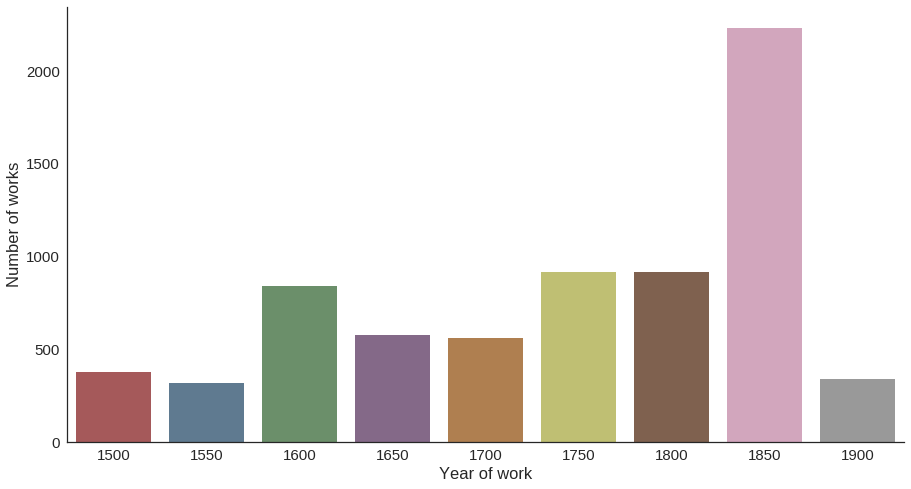

In [5]:
plt.figure(figsize=(15,8))
sns.set_context("notebook", font_scale=1.5)
pt = sns.countplot(x='rounded', data=df, palette=sns.color_palette("Set1", n_colors=11, desat=.5))
pt.set(xlabel="Year of work", ylabel="Number of works")
sns.despine()

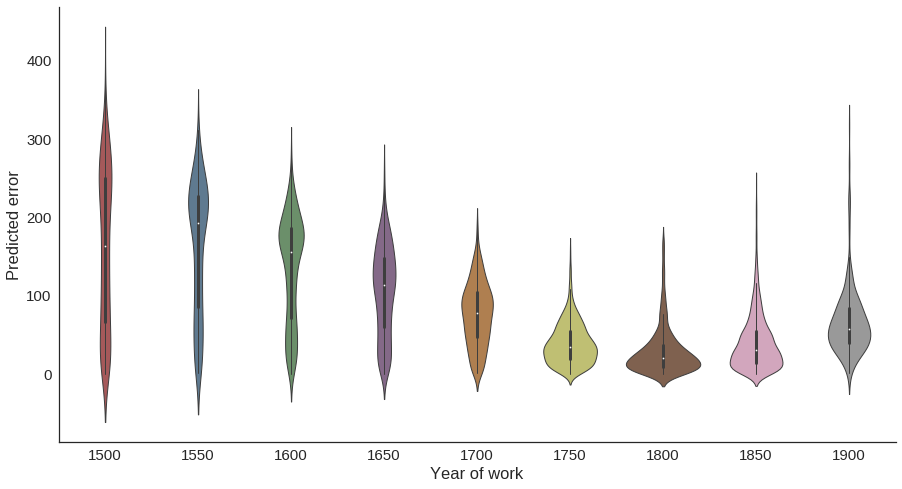

In [6]:
plt.figure(figsize=(15,8))
sns.set_context("notebook", font_scale=1.5)
pt = sns.violinplot(x='rounded', y='diff', data=df, linewidth=1, palette=sns.color_palette("Set1", n_colors=11, desat=.5))
pt.set(xlabel="Year of work", ylabel="Predicted error")
sns.despine()

In [5]:
df = df.sort_values('diff')
hits = df.iloc[0:50]
misses = df.tail(50)

In [47]:
def generate_image_set(df, num_images=5):
    if hasattr(df, 'path'):
        images = [(Image.open(row.path).convert('RGB'), row.year, row.pred) for row in df.itertuples()]
    else:
        images = [(row.img, row.year, row.pred) for row in df.itertuples()]
    [img.thumbnail((400, 400)) for img, _, _ in images]
    width = 250; height = 250
    images = [(img.crop((img.size[0] / 2 - width/2, img.size[1] / 2 - height/2, 
                        img.size[0] / 2 + width/2, img.size[1] / 2 + height/2)), year, pred) for img, year, pred in images]
    images = random.sample(images, min(len(images), num_images))
    fnt = ImageFont.truetype('/media/liza/ext-drive/liza/fonts/StagSans-Book.otf', 30)
    im = Image.new('RGB', (num_images * width, height), (255, 255, 255))
    x_offset = 0
    for img, year, pred in images:
        draw = ImageDraw.Draw(img)
        draw.rectangle((0, height - 35, 5 * width, height), fill=(50, 50, 50))
        draw.line((width, 0, width, height), width=10, fill=(255, 255, 255))
        draw.text((10, height - 30), str(year), fill=(200, 200, 100), font=fnt)
        draw.text((180, height - 30), str(pred), fill=(100, 200, 200), font=fnt)
        im.paste(img, (x_offset, 0))
        x_offset += 250

    return im

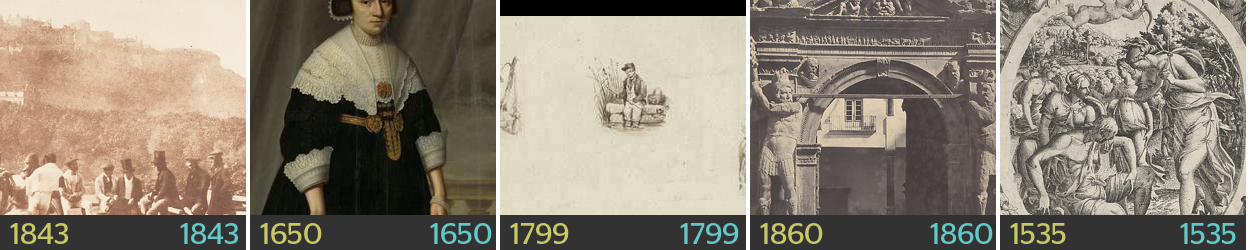

In [7]:
generate_image_set(hits)

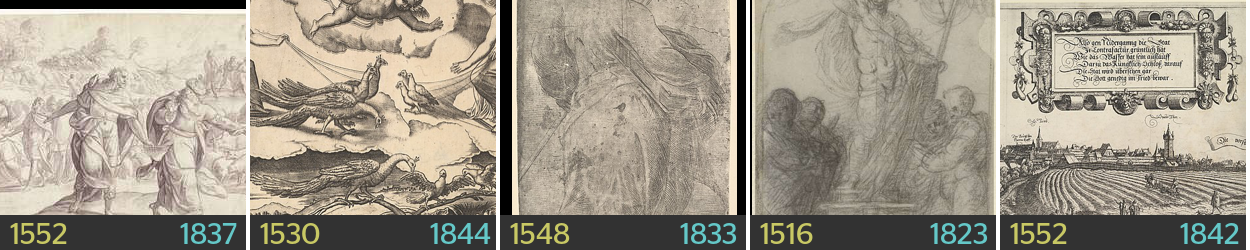

In [8]:
generate_image_set(misses)

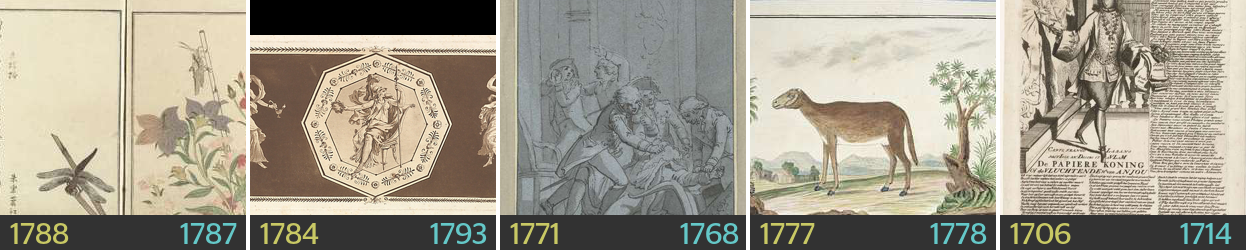

In [9]:
generate_image_set(df.loc[(df['year'].isin(range(1700, 1800)) & (df['diff'] < 10))])

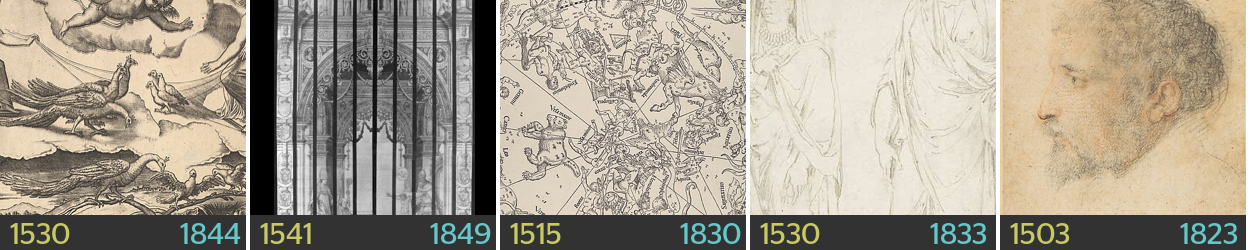

In [10]:
generate_image_set(df.loc[df['diff'] > 300])

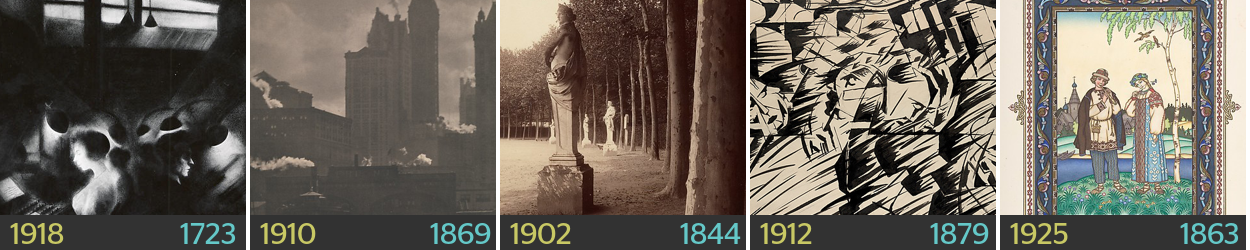

In [11]:
generate_image_set(df.loc[df['year'] > 1900])

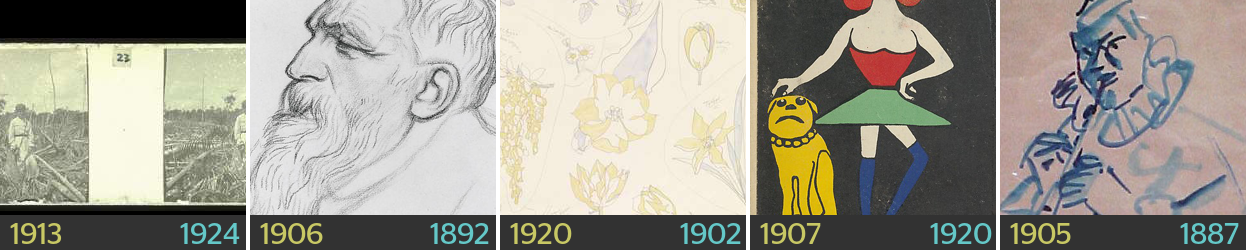

In [58]:
generate_image_set(df.loc[(df['diff'] < 20) & (df['year'] > 1900)])

In [54]:
famous_paintings = [{'year': 1892, 'url': 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Paul_Gauguin%2C_Nafea_Faa_Ipoipo%3F_%28When_Will_You_Marry%3F%29_1892%2C_oil_on_canvas%2C_101_x_77_cm.jpg/901px-Paul_Gauguin%2C_Nafea_Faa_Ipoipo%3F_%28When_Will_You_Marry%3F%29_1892%2C_oil_on_canvas%2C_101_x_77_cm.jpg'},
                   {'year': 1907, 'url': 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Gustav_Klimt_046.jpg/1197px-Gustav_Klimt_046.jpg'},
                   {'year': 1526, 'url': 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Darmstadtmadonna.jpg/846px-Darmstadtmadonna.jpg'},
                   {'year': 1664, 'url': 'https://upload.wikimedia.org/wikipedia/commons/c/c8/Vermeer_The_concert.JPG'},
                   {'year': 1633, 'url': 'https://upload.wikimedia.org/wikipedia/commons/f/f3/Rembrandt_Christ_in_the_Storm_on_the_Lake_of_Galilee.jpg'},
                   {'year': 1886, 'url': 'https://upload.wikimedia.org/wikipedia/commons/e/ee/Van_Gogh_-_Vase_mit_Pechnelken.jpeg'}, 
                   {'year': 1888, 'url': 'https://upload.wikimedia.org/wikipedia/commons/b/bc/Girl_in_Front_of_Open_Window.jpg'},
                   {'year': 1514, 'url': 'https://upload.wikimedia.org/wikipedia/commons/9/95/Raphael_missing.jpg'},
                   {'year': 1503, 'url': 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/804px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg'},
                   {'year': 1607, 'url': 'https://upload.wikimedia.org/wikipedia/commons/b/b1/CaravaggioJeromeValletta.jpg'}]

In [55]:
results = []
for p in famous_paintings:
    pred, img = predict_by_url(p['url'])
    results.append({'pred': pred, 'img': img, 'year': p['year']})


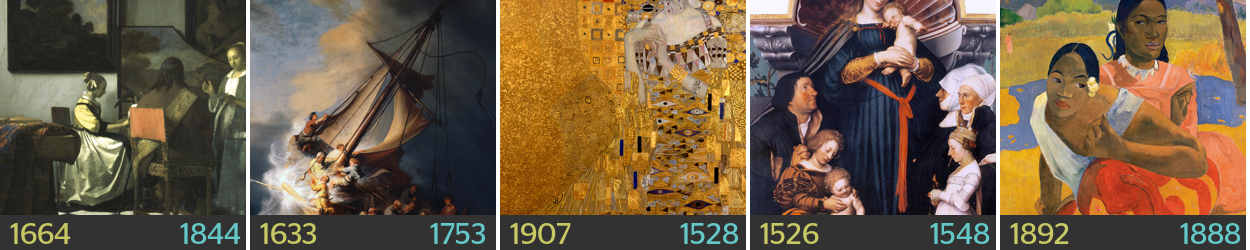

In [56]:
generate_image_set(pd.DataFrame(results[0:5]))

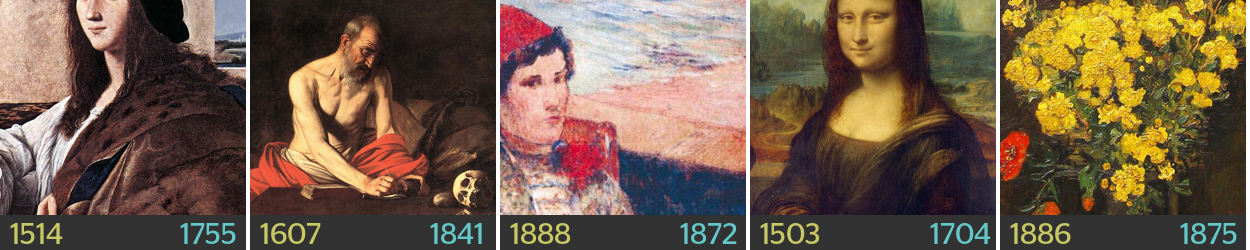

In [57]:
generate_image_set(pd.DataFrame(results[5:]))